## LIBRARIES

In [32]:
import pandas as pd
#DATA SAMPLER
from sklearn.model_selection import train_test_split 
#SCATTER PLOT
import matplotlib.pyplot as plt
import seaborn as sns
#CATEGORICAL TO NUMERICAL (PREPROCESSING)
from sklearn.preprocessing import LabelEncoder
#TEST RESULT
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree               #VISALUIZE DECISION TREE

# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

# SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# NEURAL NETWORK (MULTI LAYER PERCEPTRON)
from sklearn.neural_network import MLPClassifier

## FILE SETUP AND PREPROCESS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   HeartRate          1000 non-null   float64 
 1   SkinConductance    1000 non-null   float64 
 2   EEG                1000 non-null   float64 
 3   Temperature        1000 non-null   float64 
 4   PupilDiameter      1000 non-null   float64 
 5   SmileIntensity     1000 non-null   float64 
 6   FrownIntensity     1000 non-null   float64 
 7   CortisolLevel      1000 non-null   float64 
 8   ActivityLevel      1000 non-null   float64 
 9   AmbientNoiseLevel  1000 non-null   float64 
 10  LightingLevel      1000 non-null   float64 
 11  EmotionalState     1000 non-null   category
 12  CognitiveState     1000 non-null   category
 13  EngagementLevel    1000 non-null   int64   
dtypes: category(2), float64(11), int64(1)
memory usage: 96.1 KB
None


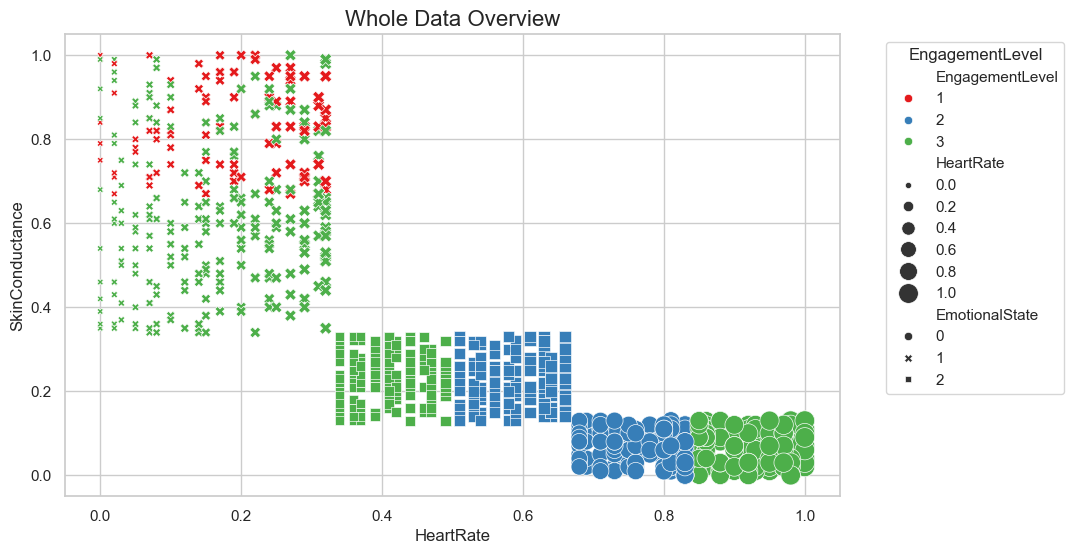

In [34]:
#WHOLE FILE = df
#******************************************FILE******************************************
# FILE SETUP
# FILE LOCATION
df = pd.read_csv(r"G:\MIKE\Programming\2024\Repositories\Atillo-MachineLearning\Updated\Emotional Monitoring\CSV AND EXCEL\emotional_monitoring_dataset_with_target_NORMALIZED CLEAN CSV.csv")

# TYPE ASSIGNING
df['EmotionalState'] = df['EmotionalState'].astype('category')
df['CognitiveState'] = df['CognitiveState'].astype('category')

# ROLE ASSIGNING
target = df['EngagementLevel']                   # Target    (EngagementLevel)
features = df.drop(columns=['EngagementLevel'])  # Feature   (Rest of the Columns)

# SHOW COLUMN TYPES AND DETAILS
print(df.info())  
#******************************************FILE******************************************




#******************************************PREPROCESS******************************************
# TURNING EmotionalState AND CognitiveState TO NUMBERICAL
# INSTANTIATION TO THE CLASS
label_encoder = LabelEncoder()

# TURN CATEGORICAL TO NUMERICAL
df['EmotionalState'] = label_encoder.fit_transform(df['EmotionalState'])
df['CognitiveState'] = label_encoder.fit_transform(df['CognitiveState'])
#******************************************PREPROCESS******************************************




#******************************************SCATTER PLOT******************************************
# df SCATTER PLOT
# THEME
sns.set(style="whitegrid")

# WIDTH AND HEIGHT
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data     = df,                  # FILE
    x        = 'HeartRate',            # X-AXIS
    y        = 'SkinConductance',      # Y-AXIS
    hue      = 'EngagementLevel',    # COLOR
    style    = 'EmotionalState',   # SHAPE
    size     = 'HeartRate',         # SIZE
    sizes    = (20, 200),          
    palette  = 'Set1',        # COLOR PALLETE FOR #COLOR
)

# PLOT LABELS
plt.title('Whole Data Overview',  fontsize = 16)
plt.xlabel('HeartRate',           fontsize = 12)
plt.ylabel('SkinConductance',     fontsize = 12)

# DRAW PLOT
plt.legend(title='EngagementLevel', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.show()
#******************************************SCATTER PLOT******************************************


In [35]:
#TRAINDATA = 70%, 
#TESTDATA  = 30%
#******************************************DATA SAMPLER******************************************
trainData, testData = train_test_split(df, test_size=0.3, random_state=0)

print("Number of samples in trainData : ", trainData.shape[0])
print("Number of samples in testData  : ", testData.shape[0])
print("                    TOTAL DATA : ", df.shape[0])
#******************************************DATA SAMPLER******************************************

Number of samples in trainData :  700
Number of samples in testData  :  300
                    TOTAL DATA :  1000


In [36]:

#X_train   = FEATURES
#y_train   = TARGET
#******************************************GET TRAIN AND TEST DATA ROLES******************************************
X_train = trainData.drop(columns=['EngagementLevel'])   # FEATURES (EXCEPT EngagementLevel)
y_train = trainData['EngagementLevel']                  # TARGET

X_test = testData.drop(columns=['EngagementLevel'])     # FEATURES (EXCEPT EngagementLevel)
y_test = testData['EngagementLevel']                    # TARGET
#******************************************GET TRAIN AND TEST DATA ROLES******************************************


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ------------------------------TREE MODEL------------------------------

Text(0.5, 1.0, 'Decision Tree')

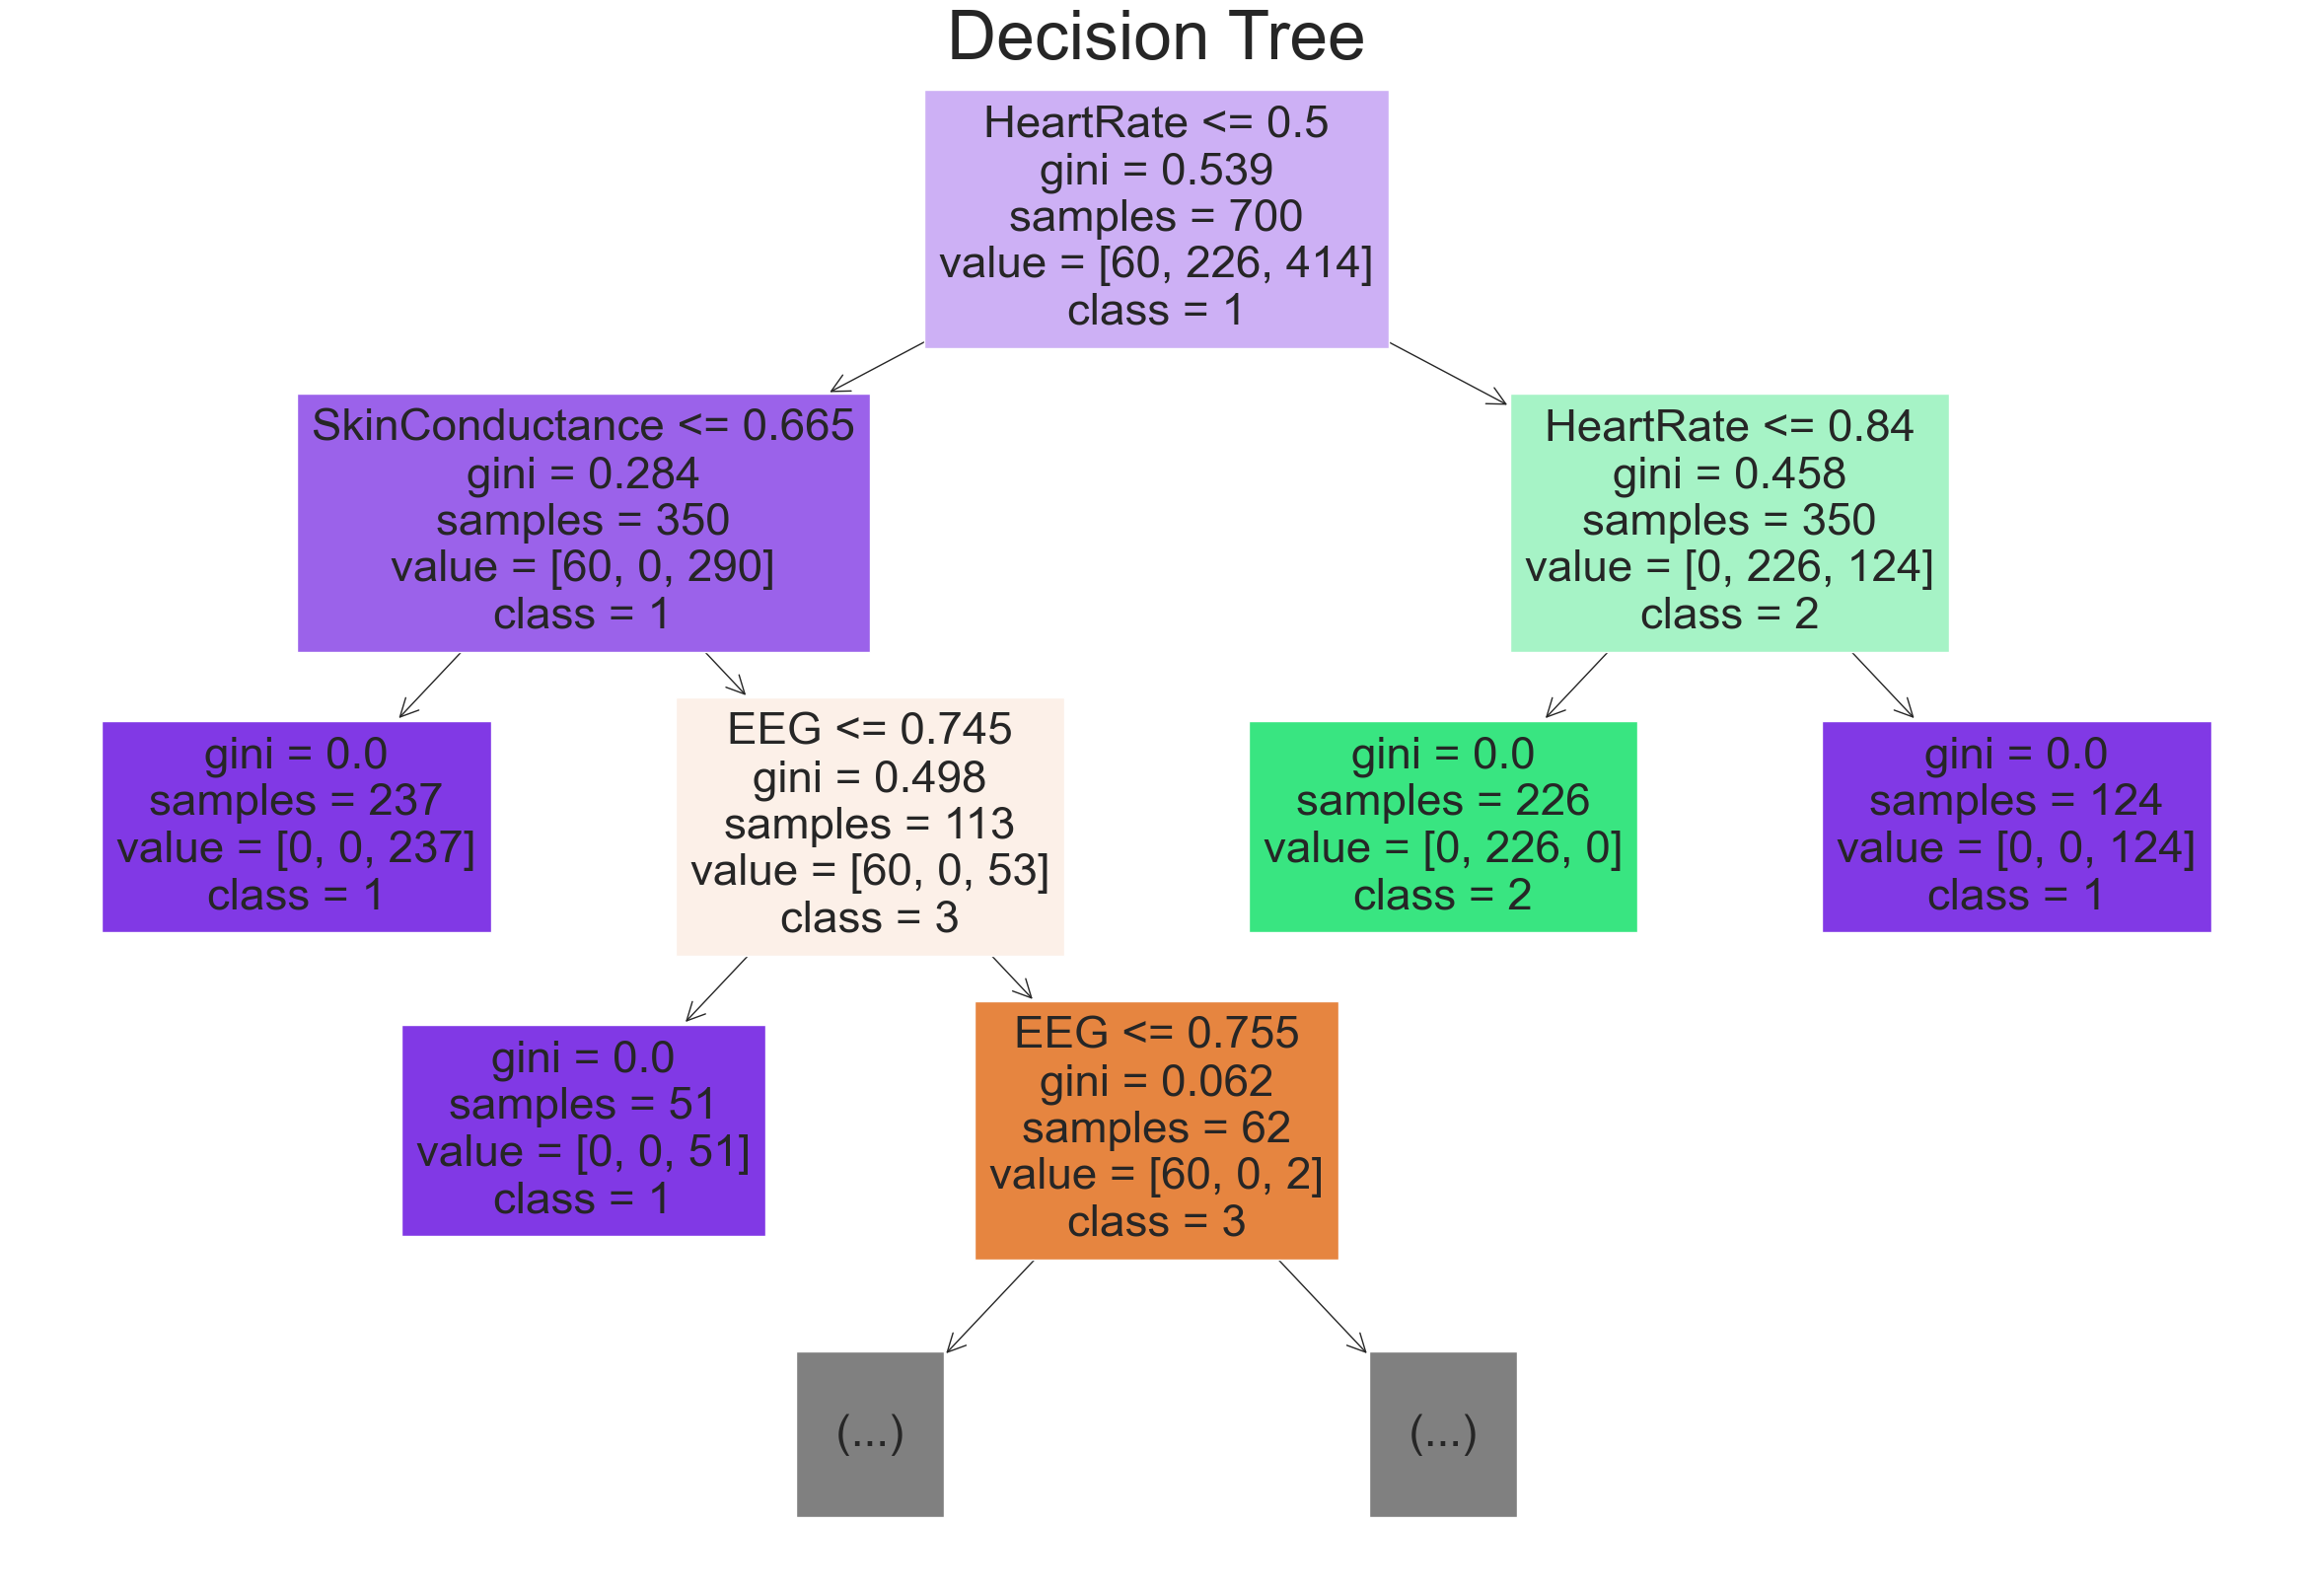

In [58]:
#X_train   = FEATURES
#y_train   = TARGET
#treeModel = ACTUAL TREE MODEL
#******************************************TREE******************************************
# TREE PARAMETERS
treeModel = DecisionTreeClassifier(
    criterion         = 'gini',         # SPLITING MODEL
    max_depth         = 100,            # TREE DEPTH
    min_samples_leaf  = 2,              # MINIMUM SAMPLES LEAF
    min_samples_split = 5,              # MIN. SAMPLES SPLIT
    max_features      = None,           # IDK BRO
    random_state      = 0,              # SEED
)

# Train the model
treeModel.fit(X_train, y_train)

plt.figure(figsize=(30, 20))  # WIDTH AND HEIGHT
plot_tree(treeModel, 
          filled = True, 
          feature_names = X_train.columns.tolist(),
          class_names = y_train.unique().astype(str).tolist(), 
          max_depth = 3)                                          # TREE LEAF LIMIT

plt.title("Decision Tree", fontsize=50)
#******************************************TREE******************************************

ACCURACY: 100.00%

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        98
           3       1.00      1.00      1.00       165

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



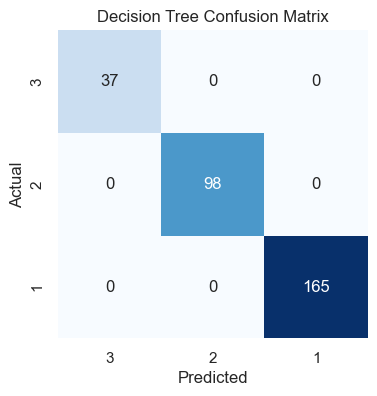

In [56]:
#X_test = FEATURES
#y_test = TARGET
#y_pred_Tree = ACTUAL PREDICTION 
#******************************************TREE PREDICTIONS******************************************
#ACTUAL PREDICTION
y_pred_Tree = treeModel.predict(X_test)
#******************************************TREE PREDICTIONS******************************************


#******************************************TREE ACCURACY DISPLAY******************************************
# WRITE ACCURACY SCORE
accuracy = accuracy_score(y_test, y_pred_Tree)
print(f"ACCURACY: {accuracy * 100:.2f}%\n")

# WRITE CLASSIFICATION REPORT
print("Classification Report:")
print(classification_report(y_test, y_pred_Tree))

# DRAW CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred_Tree)

plt.figure(figsize=(4, 4))  # WIDTH HEIGHT
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#******************************************TREE ACCURACY DISPLAY******************************************

# ------------------------------LOGIGTIC REGRESSION------------------------------

ACCURACY: 63.67%

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.57      0.72        37
           2       0.53      0.42      0.47        98
           3       0.64      0.78      0.70       165

    accuracy                           0.64       300
   macro avg       0.72      0.59      0.63       300
weighted avg       0.65      0.64      0.63       300



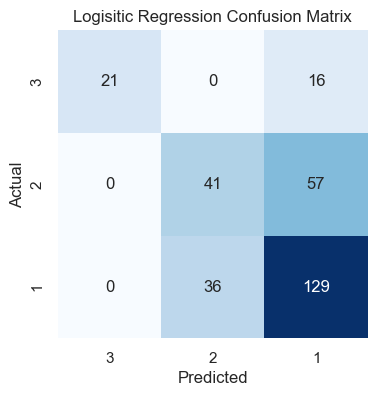

In [60]:
#USING X_train AND y_train in TREE MODEL
#******************************************LOGISTIC REGRESSION******************************************
log_reg = LogisticRegression( 
    penalty      = 'l2',
    C            = 1,
    random_state = 0,
    max_iter     = 150 )

log_reg.fit(X_train, y_train)
#******************************************LOGISTIC REGRESSION******************************************




#******************************************LOGISTIC REGRESSION PREDICTION******************************************
y_pred_Log_Reg = log_reg.predict(X_test)
#******************************************LOGISTIC REGRESSION PREDICTION******************************************




#******************************************LOGISTIC REGRESSION DISPLAY******************************************
# WRITE ACCURACY SCORE
accuracy = accuracy_score(y_test, y_pred_Log_Reg)
print(f"ACCURACY: {accuracy * 100:.2f}%\n")

# WRITE CLASSIFICATION REPORT
print("Classification Report:")
print(classification_report(y_test, y_pred_Log_Reg))

# DRAW CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred_Log_Reg)

plt.figure(figsize=(4, 4))  # WIDTH HEIGHT
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title('Logisitic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#******************************************LOGISTIC REGRESSION DISPLAY******************************************

# ------------------------------SVM------------------------------

ACCURACY: 90.33%

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.59      0.72        37
           2       0.91      0.97      0.94        98
           3       0.90      0.93      0.91       165

    accuracy                           0.90       300
   macro avg       0.91      0.83      0.86       300
weighted avg       0.90      0.90      0.90       300



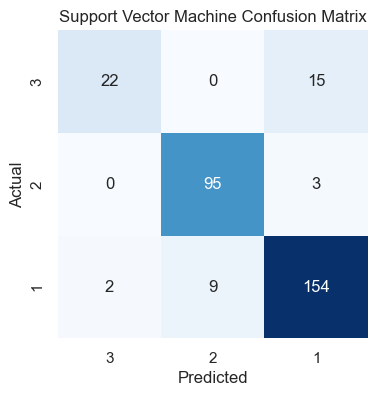

In [62]:
#******************************************SVM******************************************
svm_classifier = SVC(
    kernel='rbf',   # KERNEL
    C=1,            # COST PARAMETER RELATED TO COMPLEXITY BOUND
    gamma='auto',   # G
    tol=0.001,      # NUMERICAL TOLERANCE
    max_iter=400    # ITERATION LIMIT
)

svm_classifier.fit(X_train_scaled, y_train)
#******************************************SVM******************************************




#******************************************SVM PREDICTION******************************************
y_pred_SVM = svm_classifier.predict(X_test_scaled)
#******************************************SVM PREDICTION******************************************




#******************************************LOGISTIC REGRESSION DISPLAY******************************************
# WRITE ACCURACY SCORE
accuracy = accuracy_score(y_test, y_pred_SVM)
print(f"ACCURACY: {accuracy * 100:.2f}%\n")

# WRITE CLASSIFICATION REPORT
print("Classification Report:")
print(classification_report(y_test, y_pred_SVM))

# DRAW CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred_SVM)

plt.figure(figsize=(4, 4))  # WIDTH HEIGHT
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#******************************************LOGISTIC REGRESSION DISPLAY******************************************

# ------------------------------Neural Network------------------------------

ACCURACY: 90.33%

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.59      0.72        37
           2       0.91      0.97      0.94        98
           3       0.90      0.93      0.91       165

    accuracy                           0.90       300
   macro avg       0.91      0.83      0.86       300
weighted avg       0.90      0.90      0.90       300



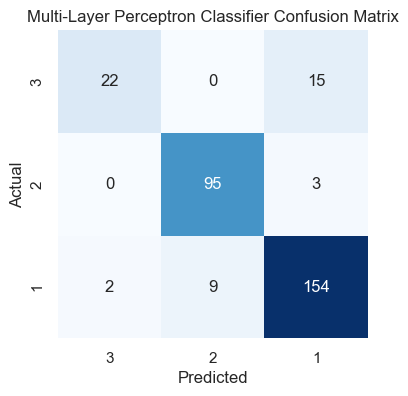

In [64]:
#******************************************NEURAL NETWORK******************************************
mlp_classifier = MLPClassifier(
    hidden_layer_sizes = (100,),        # 100 neurons in the hidden layer
    activation         = 'relu',        # Activation function: ReLU
    solver             = 'adam',        # Optimizer: Adam
    alpha              = 0.0001,        # Regularization parameter (L2 penalty)
    max_iter           = 1000,           # Maximum number of iterations
    random_state       = 0             # Ensures reproducibility
)

mlp_classifier.fit(X_train_scaled, y_train)
#******************************************NEURAL NETWORK******************************************




#******************************************NEURAL NETWORK******************************************
y_pred_NeuralNetwork = svm_classifier.predict(X_test_scaled)
#******************************************NEURAL NETWORK******************************************



#******************************************LOGISTIC REGRESSION DISPLAY******************************************
# WRITE ACCURACY SCORE
accuracy = accuracy_score(y_test, y_pred_NeuralNetwork)
print(f"ACCURACY: {accuracy * 100:.2f}%\n")

# WRITE CLASSIFICATION REPORT
print("Classification Report:")
print(classification_report(y_test, y_pred_NeuralNetwork))

# DRAW CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred_NeuralNetwork)

plt.figure(figsize=(4, 4))  # WIDTH HEIGHT
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title('Multi-Layer Perceptron Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#******************************************LOGISTIC REGRESSION DISPLAY******************************************